In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re

In [ ]:
data = pd.read_csv('gojek.csv')

In [ ]:
data = data.dropna(subset=['content', 'score'])

In [ ]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.strip()
    return text

In [ ]:
data['cleaned_content'] = data['content'].apply(clean_text)

In [ ]:
def map_sentiment(score):
    if score in [1, 2]:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

data['sentiment'] = data['score'].apply(map_sentiment)

<ipython-input-8-f40d775e2b4f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, order=['positive', 'neutral', 'negative'], palette='viridis')


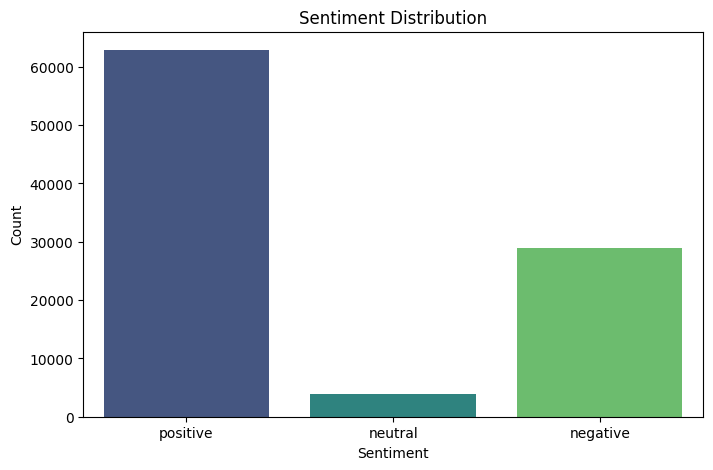

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=data, order=['positive', 'neutral', 'negative'], palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_content'])
y = data['sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.92      0.84      5769
     neutral       0.18      0.00      0.01       774
    positive       0.95      0.92      0.93     12597

    accuracy                           0.88     19140
   macro avg       0.63      0.61      0.59     19140
weighted avg       0.86      0.88      0.87     19140

Confusion Matrix:
 [[ 5306     4   459]
 [  588     3   183]
 [ 1040    10 11547]]


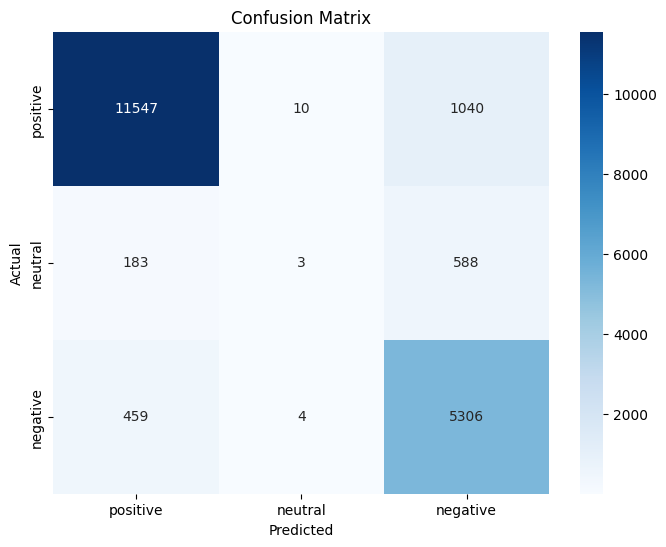

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.88


<ipython-input-14-34faf85afeb9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


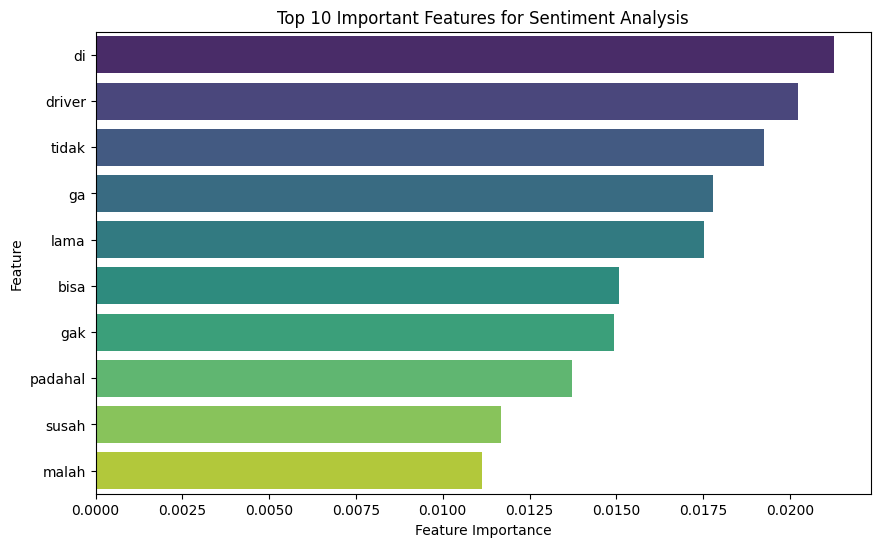

In [ ]:
feature_importances = model.feature_importances_
features = vectorizer.get_feature_names_out()
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Top 10 Important Features for Sentiment Analysis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
import pickle
with open('vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)
with open('sentiment_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)